<a href="https://colab.research.google.com/github/EisaacJC/ComputoEvolutivo/blob/main/8_reinas_computo_evolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computo Evolutivo
### Alumno: E. Isaac Juárez Caballero
### Maestría en Inteligencia Artificial

# Inicialización de librerías

In [1]:
import numpy as np
import seaborn as sns
from numpy.random import default_rng
import random
import matplotlib.pyplot as plt
from sortedcontainers import SortedKeyList
import itertools
import pandas as pd

# Creación de tableros

In [2]:
def tableros_c(dim, population):
    """
    Se crean n=population tableros de dimensión dim
    todos generados a partir de numeros aleatorios
    """
    tableros=[]
    for i in range(population):
        tableros.append(random.sample(range(0,dim),dim))
    return tableros

# Reconstrucción de tableros

In [3]:
def reconstruir(tablero):
    """
    La función reconstruir tablero es una función que pide un tablero en la 
    representación de tupla y retorna una matriz de n*n
    esta representación es útil para realizar las gráficas.
    """
    reconstruido=np.zeros((len(tablero),len(tablero)))
    for i in range(len(tablero)):
        reconstruido[i][tablero[i]]=1
    return reconstruido

# Definición de la función de utilidad

In [4]:
def utility_f(tablero):
    """Recibe como entrada un tablero en su forma comprimida
    y retorna la utilidad del tablero, el funcionamiento del mismo se comporta 
    según una función por maximizar, es decir queremos encontrar los valores de la función
    """
    utilidad=0
    for i in range(0,len(tablero)):
        for j in range(0,len(tablero)):
            if (j==i):
                continue
            if(tablero[j]==tablero[i]):
                continue
            if (j+tablero[j]==i+tablero[i]):
                continue
            if (j-tablero[j]==i-tablero[i]):
                continue
            utilidad=utilidad+1
    return utilidad/2

# Definición del orden de los tableros según su función de utilidad

In [5]:
def orden(tableros):
    """
    Retorna los tableros en orden según utilidad como primer elemento, como segundo la lista de utilidad
    """
    scores=[]
    for tablero in tableros:
        scores.append([tablero,28-utility_f(tablero)])
    ordenado = sorted(scores, key=lambda x: x[1],reverse=True)
    return ordenado

# Definición de la cruza entre dos padres

In [6]:
def cruza(padre1,padre2):
    """
    Si el input proviene de una lista de valores ordenados de tableros con su función de utilidad
    entonces la entrada de los padres será ordenado[i][0]
    """
    n=random.randint(1,7)
    hijo1=padre1[:n]+padre2[n:]
    hijo2=padre2[:n]+padre1[n:]
    l=[hijo1, hijo2]
    return l

# Definición de la función de mutación

In [7]:
def mutacion(tablero, probmut):
    tab=tablero
    n=random.random()
    j=random.randint(0,len(tablero)-1)
    if n<probmut:
        a=random.randint(0,len(tablero)-1)
        tab[j]=a
    return tab    

# Función que ejecuta al algoritmo evolutivo

In [8]:
def evolutivo(n,dim,population, pm):
    """
    n numero de generaciones
    dim dimension del tablero
    population poblacion inicial
    pm probability of mutation
    """
    pop=tableros_c(dim,population)
    pop2=pop
    generaciones=n
    for i in range(generaciones):
        pop3=[]
        stablero=[]
        if i==0:
            #Si i es igual a cero la población es la población inicial
            pop=pop2
            #print(df1)
        if i>=1:
            #Si i es mayor que cero mi población serán los tableros más cool
            pop=df1["tablero"][:len(pop)]
            stablero=[]
        for tablero in pop:
            #print(len(pop3))
            pop3.append(mutacion(tablero, pm))
        #Selecciono una muestra de un quinto de la población inicial
        sample=random.sample(pop3,int(len(pop2)/5))
        #ordeno por la puntuación los tableros de la población inicial
        df = pd.DataFrame(orden(pop3), columns =['tablero', 'puntuacion'])
        #Extraigo los tableros de la población inicial con mejor score
        stablero=df["tablero"][:len(pop2)]
        #Realizo la cruza de los tableros, remplazando los peores
        for j in range(len(pop2)):
            stablero[-j],stablero[-j-1]=cruza(random.sample(sample,2)[0],random.sample(sample,2)[1])
        #Una vez remplazados los peores tableros los vuelvo un df
        #orden(stablero)
        df1 = pd.DataFrame(orden(stablero), columns =['tablero', 'puntuacion'])
        #df1.astype({"tablero": object, "puntuacion": float},copy=True)
        #df1["puntuacion"]=(1-df1["puntuacion"]/len(pop))
        #Ordeno los valores según su puntuación
        df1=df1.sort_values(by=['puntuacion'],ascending=True)
        df1=df1[:len(pop2)]
        df1=df1.reset_index(drop=True)
        #Extraigo la nueva población para la siguiente generación-
        stablero2=df1["tablero"][:len(pop2)]
    return df1
    

In [32]:
def evolutivo2(n,dim,population, pm):
    """
    n numero de generaciones
    dim dimension del tablero
    population poblacion inicial
    pm probability of mutation
    """
    medianscores=[]
    pop=tableros_c(dim,population)
    pop2=pop
    generaciones=n
    for i in range(generaciones):
        pop3=[]
        stablero=[]
        if i==0:
            #Si i es igual a cero la población es la población inicial
            pop=pop2
            #print(df1)
        if i>=1:
            #Si i es mayor que cero mi población serán los tableros más cool
            pop=df1["tablero"][:len(pop)]
            stablero=[]
        for tablero in pop:
            #print(len(pop3))
            pop3.append(mutacion(tablero, pm))
        #Selecciono una muestra de un quinto de la población inicial
        sample=random.sample(pop3,int(len(pop2)/5))
        #ordeno por la puntuación los tableros de la población inicial
        df = pd.DataFrame(orden(pop3), columns =['tablero', 'puntuacion'])
        #Extraigo los tableros de la población inicial con mejor score
        stablero=df["tablero"][:len(pop2)]
        #Realizo la cruza de los tableros, remplazando los peores
        for j in range(len(pop2)):
            stablero[-j],stablero[-j-1]=cruza(random.sample(sample,2)[0],random.sample(sample,2)[1])
        #Una vez remplazados los peores tableros los vuelvo un df
        #orden(stablero)
        df1 = pd.DataFrame(orden(stablero), columns =['tablero', 'puntuacion'])
        #df1.astype({"tablero": object, "puntuacion": float},copy=True)
        #df1["puntuacion"]=(1-df1["puntuacion"]/len(pop))
        #Ordeno los valores según su puntuación
        df1=df1.sort_values(by=['puntuacion'],ascending=True)
        df1=df1[:len(pop2)]
        df1=df1.reset_index(drop=True)
        medianscores.append([df1["puntuacion"].mean(),df1["puntuacion"].std(),i])
        #Extraigo la nueva población para la siguiente generación-
        stablero2=df1["tablero"][:len(pop2)]
    df2 = pd.DataFrame(medianscores, columns =['promedio',"stdv", 'generacion'])
    return df1, df2
    

# Ejecución del código:

In [ ]:
ev=evolutivo(n=int(input("Cuántas generaciones se ejecutarán? \n")),
                    dim=int(input("Introduce la dimensión del tablero \n")),
                    population=int(input("Cuál será la población inicial? \n")),
                     pm=float(input("Cuál es la probabilidad  de mutación?")))
ev

In [55]:
ev=evolutivo2(n=300,dim=8,population=100, pm=0.4)

Text(0.5, 1.0, 'Gráfico de convergencia de la función de utilidad conforme el numero de generaciones.')

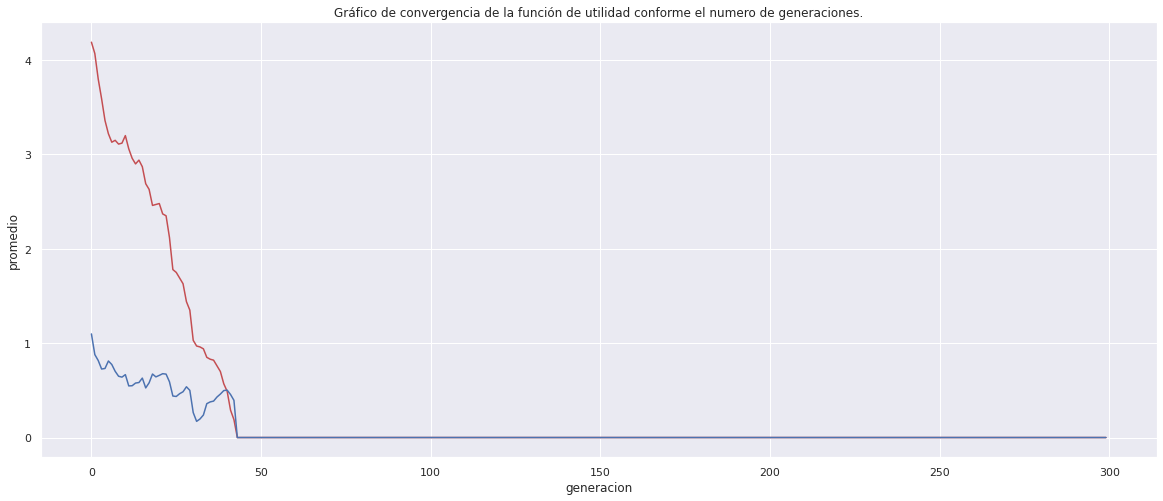

In [56]:
plt.rcParams["figure.figsize"] = (20,8)
sns.set_theme(style="darkgrid")
sns.lineplot(data=ev[1],x="generacion", y="promedio", color="r")
sns.lineplot(data=ev[1],x="generacion", y="stdv", color="b", legend="auto")
plt.title("Gráfico de convergencia de la función de utilidad conforme el numero de generaciones.")

#Visualización de los 15 tableros con mayor puntaje

In [53]:
imgs=[]
for tablero in ev[0]["tablero"]:
    imgs.append(reconstruir(tablero))

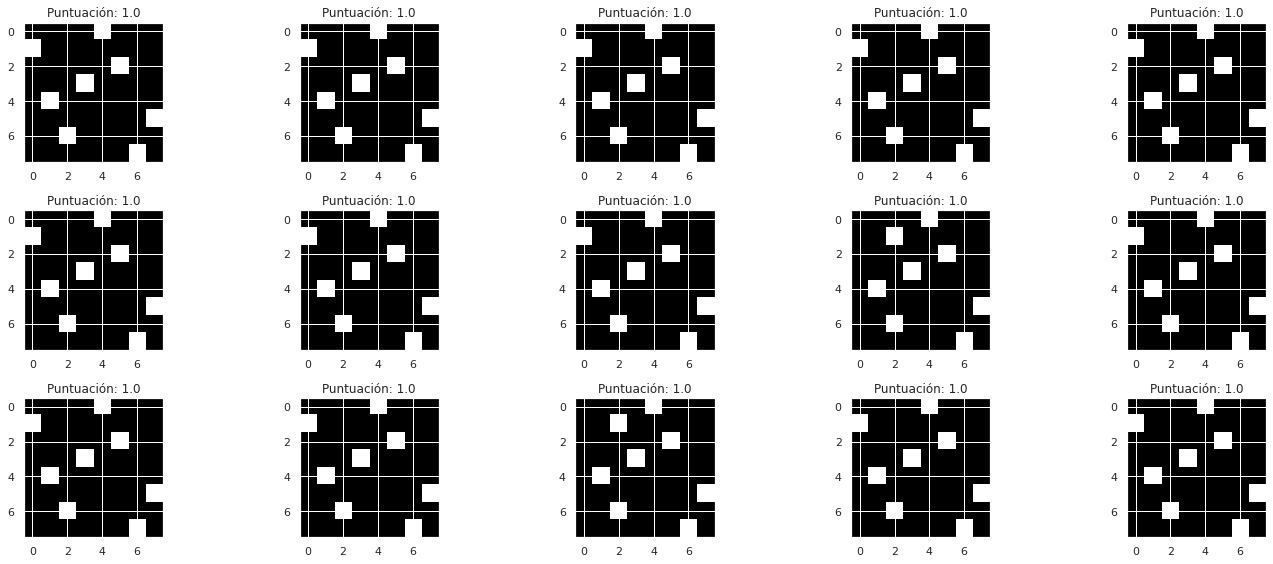

In [54]:
sns.set_theme()
plt.rcParams["figure.figsize"] = (20,8)
rows = 3
cols = 5
axes=[]
fig=plt.figure()
for a in range(rows*cols):
    b=imgs[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a==10:
        subplot_title=("Puntuación: "+ str(ev[0]["puntuacion"][a]))
    else:
        subplot_title=("Puntuación: "+ str(ev[0]["puntuacion"][a]))

    axes[-1].set_title(subplot_title)  
    plt.imshow(b, cmap="gray")
fig.tight_layout()    

plt.show()

# Algunas soluciones encontradas previamente

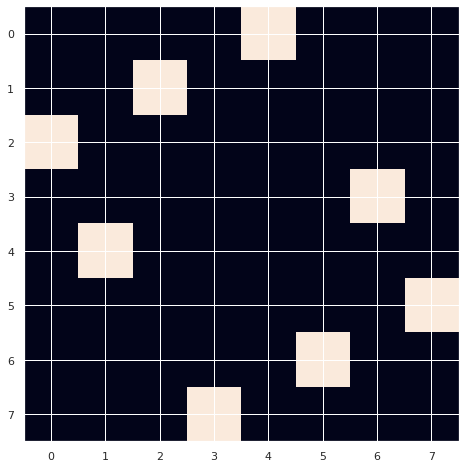

In [29]:
sns.set_theme()
plt.imshow(reconstruir([4, 2, 0, 6, 1, 7, 5, 3]))
plt.show()